# <u> CREDIT RISK ANALYSIS </u>

## <i> PROBLEM STATEMENT </i>

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

### Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '').str.replace('.', '_').str.replace('-', '_').str.replace('%', 'perc').str.replace('/', '_to_')
df.sample(5)

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
416,3030,Typhoon Holdings,0.12,0.50,0.17,0.17,0.00,0.00,0.17,0.16,...,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0.00
1370,24438,Shree Salasar,9.76,0.20,3.00,7.28,4.28,0.34,0.37,0.61,...,54.93,50.70,16.90,14.08,9.86,0,23,0.0,0.09,7.68
877,4331,Oswal Yarns,3.82,4.01,3.83,5.17,1.31,3.81,4.55,4.60,...,5.07,4.38,0.92,0.69,0.00,185,1,227.0,0.81,1.18
588,8,Advance Petroch.,1.55,0.90,1.48,5.82,4.34,3.79,3.60,5.77,...,8.64,6.93,3.13,2.56,0.85,65,36,90.0,1.31,2.70
2278,6944,Greencrest Finan,47.83,36.55,47.12,47.12,0.00,0.01,46.98,50.41,...,9.51,9.22,9.02,6.18,5.88,31,40,433.0,0.35,269.38


In [4]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [6]:
pd.options.display.float_format = '{:.2f}'.format   
pd.options.display.max_rows = 100
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.61,714001.25
Total_Debt,3586.00,1994.82,23652.84,-0.72,0.03,7.49,72.35,652823.81
Gross_Block_,3586.00,594.18,4871.55,-41.19,0.57,15.87,131.90,128477.59
Net_Working_Capital_,3586.00,410.81,6301.22,-13162.42,0.94,10.14,61.17,223257.56
Current_Assets_,3586.00,1960.35,22577.57,-0.91,4.00,24.54,135.28,721166.00
Current_Liabilities_and_Provisions_,3586.00,391.99,2675.00,-0.23,0.73,9.23,65.65,83232.98


## Missing Value Treatment

In [7]:
a=df.isnull().sum()
a.sort_values(ascending=False)

Inventory_Velocity_Days                103
Book_Value_Adj__Unit_Curr                4
Interest_Cover_Ratio_Latest              1
PBITM_perc_Latest                        1
Fixed_Assets_Ratio_Latest                1
Inventory_Ratio_Latest                   1
Debtors_Ratio_Latest                     1
Total_Asset_Turnover_Ratio_Latest        1
PBIDTM_perc_Latest                       1
PBDTM_perc_Latest                        1
CPM_perc_Latest                          1
APATM_perc_Latest                        1
Current_Ratio_Latest                     1
ROG_Net_Sales_perc                       0
ROG_Cost_of_Production_perc              0
ROG_Total_Assets_perc                    0
ROG_PBIDT_perc                           0
Co_Code                                  0
ROG_PBIT_perc                            0
ROG_Gross_Sales_perc                     0
ROG_Gross_Block_perc                     0
ROG_Capital_Employed_perc                0
ROG_PBDT_perc                            0
ROG_Market_

In [8]:
df.isnull().sum().sum()

118

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.reset_index(inplace=True)
df = df.drop(['Co_Code','Co_Name'], axis=1)
df.head()

,index,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


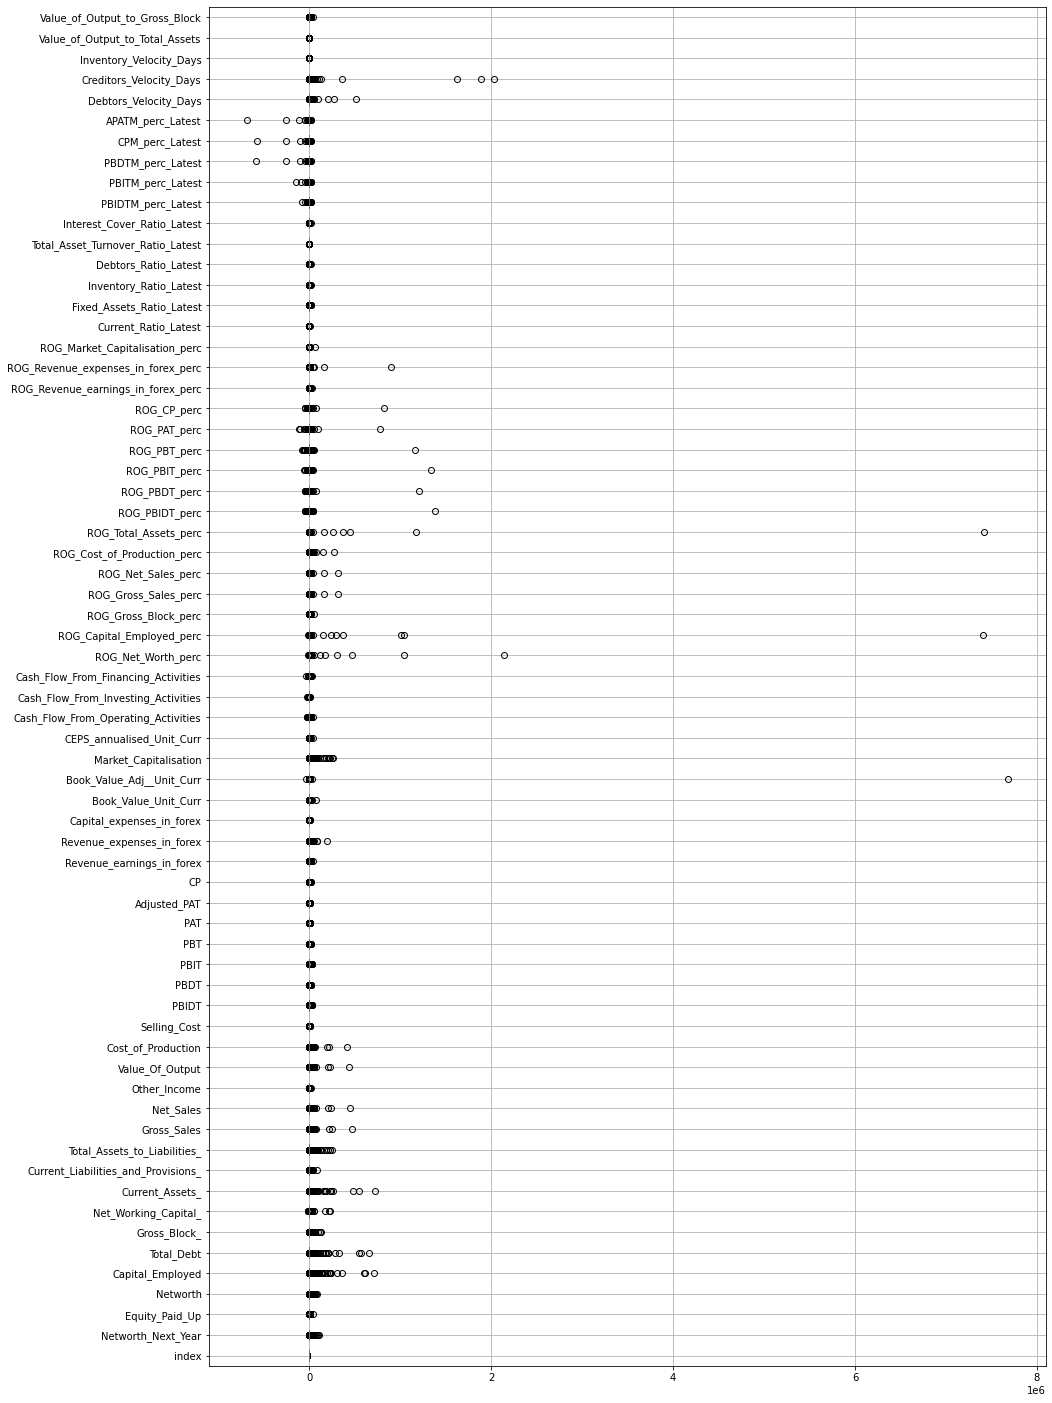

In [12]:
plt.figure(figsize=(15,25))
df.boxplot(vert=False)
plt.show()

## Create Target variable- Default with values 0 and 1


In [13]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)
df[['default','Networth_Next_Year']].sample(10)

,default,Networth_Next_Year
1040,0,5.53
2329,0,61.90
5,1,-2519.40
3091,0,604.20
784,0,3.27
1017,0,5.30
3413,0,7365.97
1905,0,25.00
1913,0,25.50
1534,0,13.35


In [14]:
df['default'].value_counts(normalize=True)

0   0.89
1   0.11
Name: default, dtype: float64

In [15]:
df['default'].value_counts()

0    3101
1     377
Name: default, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('default', axis=1))

scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df.columns[:-1]
scaled_df.head()

,index,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-1.73,-1.90,0.45,-1.94,-0.15,0.19,-0.03,-0.23,-0.08,0.28,...,0.03,0.03,0.03,0.03,0.03,-0.06,-0.04,-0.25,-0.69,-0.06
1,-1.73,-1.02,2.39,-0.91,0.08,0.26,1.72,-0.24,-0.06,0.45,...,0.02,0.02,0.02,0.02,0.02,-0.05,-0.04,-0.56,-0.43,-0.06
2,-1.73,-0.85,-0.01,-0.03,0.21,0.24,0.14,0.64,0.35,1.59,...,-2.90,-1.75,-0.67,-0.68,-0.60,-0.05,-0.03,-0.58,-0.72,-0.06
3,-1.73,-0.82,0.12,-0.32,-0.01,0.03,0.09,-0.47,-0.04,1.23,...,0.02,0.03,0.02,0.02,0.02,-0.05,-0.04,-0.56,-0.49,-0.06
4,-1.72,-0.80,-0.02,-0.43,0.09,0.18,0.10,0.22,0.14,0.93,...,-0.14,-0.10,-0.05,0.06,0.05,0.30,-0.03,-0.58,-0.68,-0.06


In [17]:
scaled_df.drop(['index'],axis=1,inplace=True)
scaled_df.sample(5)

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
3301,0.26,0.20,0.21,-0.01,-0.04,-0.07,0.25,0.05,0.14,0.12,...,0.04,0.04,0.03,0.03,0.03,-0.04,-0.04,-0.40,0.16,-0.06
77,-0.18,-0.04,-0.17,-0.08,-0.06,-0.03,-0.03,-0.07,-0.12,-0.10,...,0.02,0.03,0.03,0.03,0.03,-0.05,-0.04,-0.30,-0.14,-0.06
900,-0.15,-0.08,-0.16,-0.10,-0.08,-0.12,-0.06,-0.09,-0.15,-0.15,...,0.04,0.05,0.03,0.03,0.03,-0.06,-0.04,-0.58,-0.62,-0.03
317,-0.15,-0.07,-0.16,-0.11,-0.08,-0.12,-0.06,-0.09,-0.14,-0.15,...,0.03,0.03,0.03,0.03,0.03,-0.05,-0.04,-0.41,1.35,-0.06
2195,-0.14,-0.07,-0.15,-0.10,-0.08,-0.12,-0.06,-0.09,-0.15,-0.15,...,0.03,0.04,0.03,0.03,0.03,-0.06,-0.04,-0.58,-0.68,0.01


## Identifying Outlier and doing its Treatment

In [18]:
Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
IQR = Q3-Q1
UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

((scaled_df>UL)|(scaled_df<LL)).sum()

Networth_Next_Year                      652
Equity_Paid_Up                          431
Networth                                631
Capital_Employed                        575
Total_Debt                              560
Gross_Block_                            525
Net_Working_Capital_                    607
Current_Assets_                         558
Current_Liabilities_and_Provisions_     565
Total_Assets_to_Liabilities_            555
Gross_Sales                             537
Net_Sales                               541
Other_Income                            576
Value_Of_Output                         543
Cost_of_Production                      539
Selling_Cost                            586
PBIDT                                   663
PBDT                                    792
PBIT                                    706
PBT                                     927
PAT                                     927
Adjusted_PAT                            938
CP                              

In [19]:
print('Total outliers-',((scaled_df>UL)|(scaled_df<LL)).sum().sum())
print('Total cells-',scaled_df.count().sum())
print('% of outliers in data-',((scaled_df>UL)|(scaled_df<LL)).sum().sum()/scaled_df.count().sum())

Total outliers- 40779
Total cells- 226070
% of outliers in data- 0.1803821825098421


In [20]:
def remove_outlier(col):
    sorted (col)
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    return LL, UL

for i in scaled_df.columns:
    lr,ur = remove_outlier(scaled_df[i])
    scaled_df[i] = np.where(scaled_df[i]>ur, ur, scaled_df[i])
    scaled_df[i] = np.where(scaled_df[i]<lr, lr, scaled_df[i])

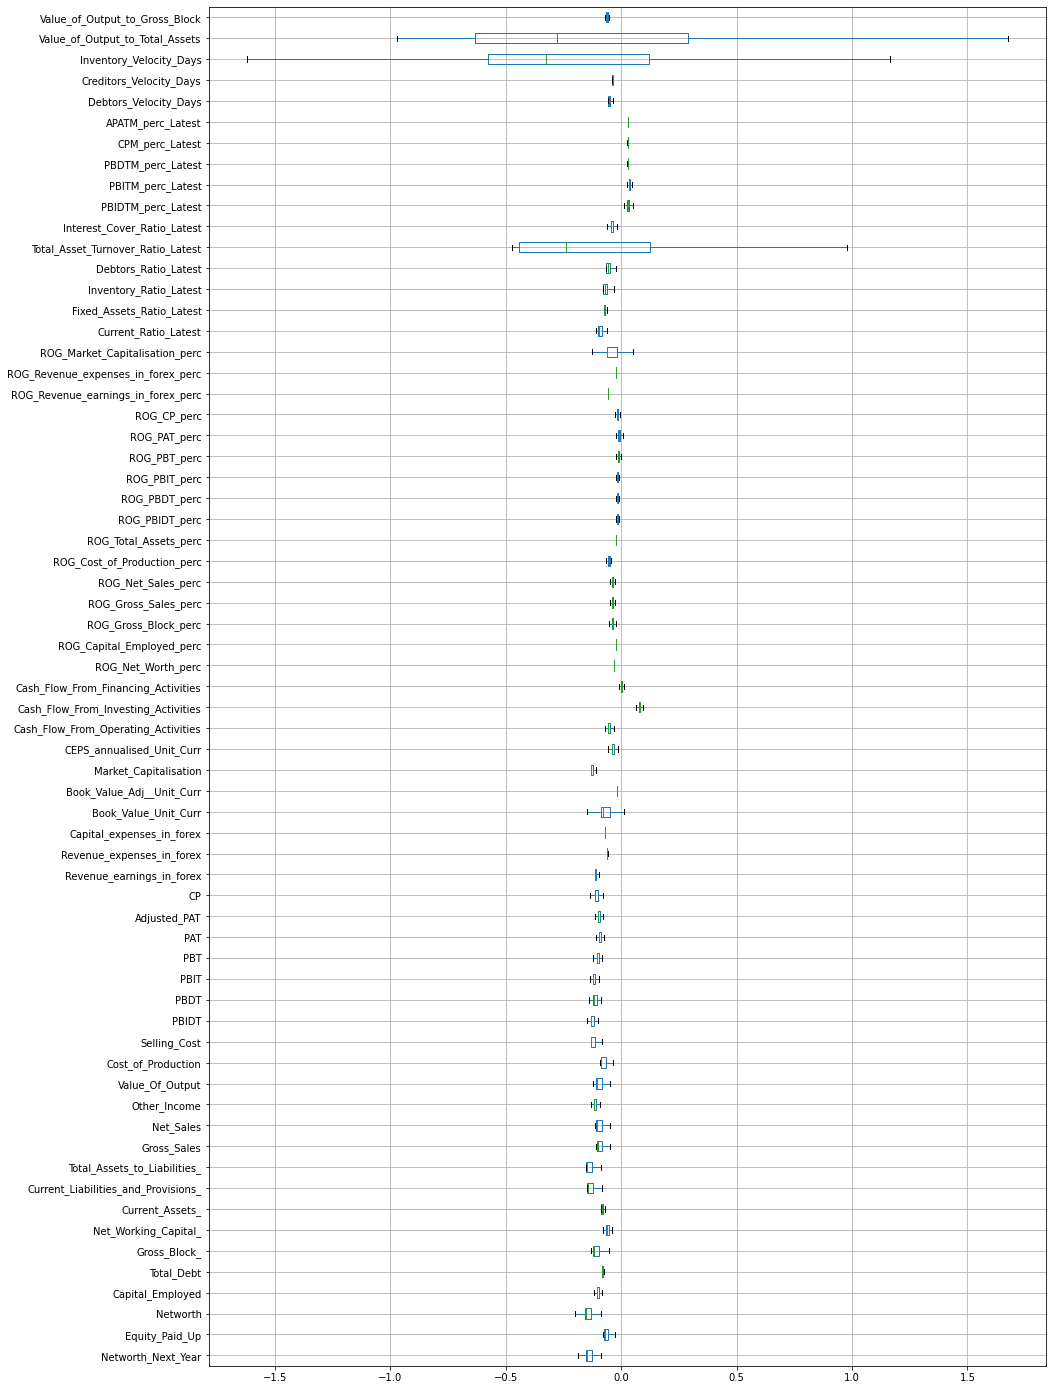

In [21]:
plt.figure(figsize=(15,25))
scaled_df.boxplot(vert=False)
plt.show()

In [22]:
scaled_df['Default'] = df['default']
scaled_df.sample(5)

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
2845,-0.10,-0.06,-0.10,-0.08,-0.07,-0.05,-0.06,-0.08,-0.10,-0.09,...,0.04,0.03,0.03,0.03,-0.06,-0.04,-0.49,-0.30,-0.06,0
1065,-0.15,-0.07,-0.16,-0.10,-0.08,-0.12,-0.06,-0.08,-0.14,-0.15,...,0.04,0.03,0.03,0.03,-0.05,-0.04,0.17,0.88,-0.06,0
2142,-0.14,-0.05,-0.15,-0.10,-0.08,-0.12,-0.06,-0.08,-0.15,-0.15,...,0.05,0.03,0.03,0.03,-0.05,-0.04,1.16,-0.61,-0.06,0
2886,-0.09,-0.07,-0.09,-0.09,-0.08,-0.05,-0.07,-0.08,-0.13,-0.11,...,0.04,0.03,0.03,0.03,-0.06,-0.04,-0.46,-0.47,-0.06,0
1468,-0.15,-0.07,-0.16,-0.10,-0.08,-0.12,-0.06,-0.08,-0.14,-0.15,...,0.04,0.03,0.03,0.03,-0.05,-0.04,-0.09,0.39,-0.06,0


In [23]:
scaled_df.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG

In [24]:
scaled_df.isnull().sum().sum()

0

In [25]:
scaled_df.shape

(3478, 66)

In [26]:
df.shape

(3478, 67)

## EDA

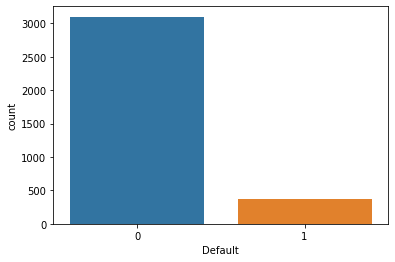

In [27]:
sns.countplot(scaled_df['Default']);

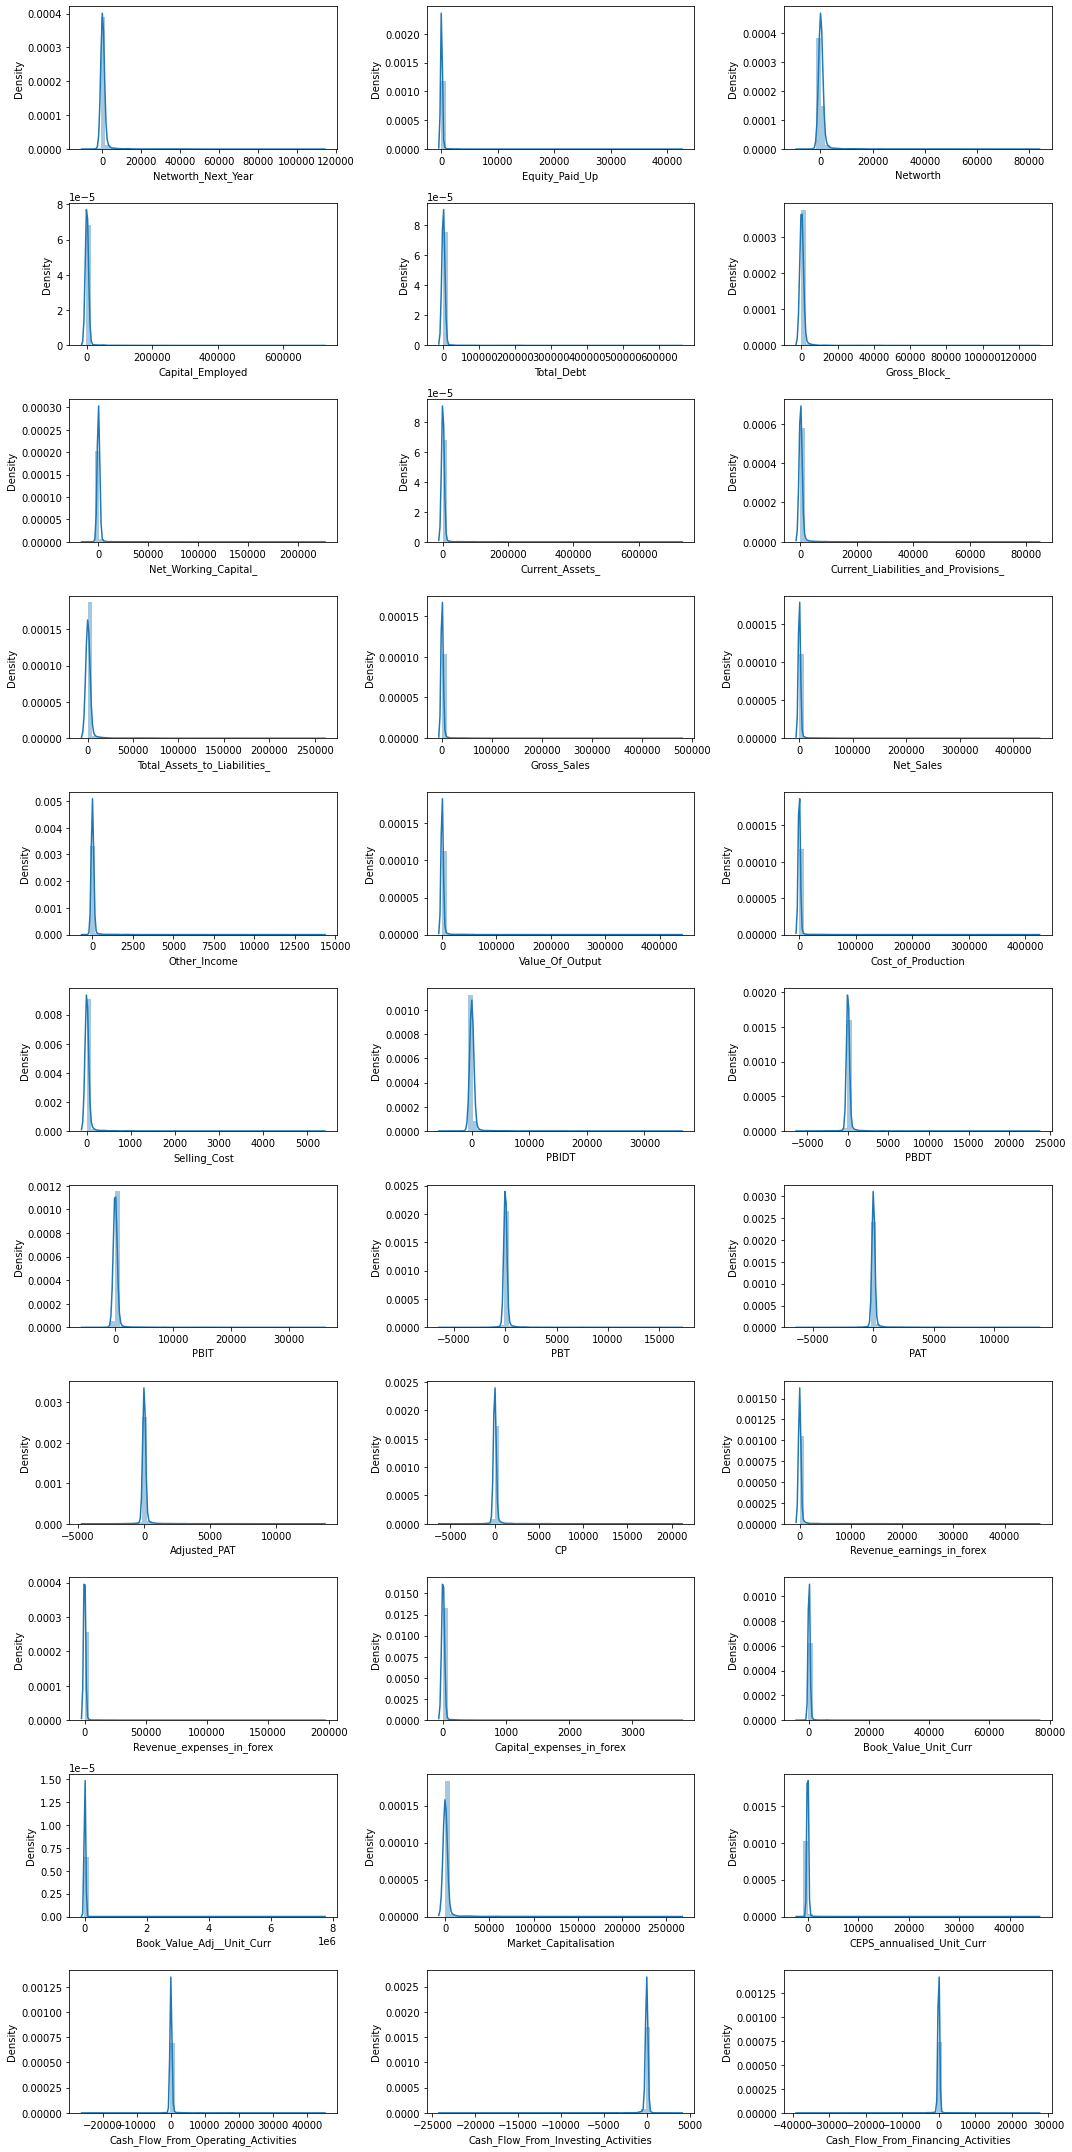

In [28]:
Comp=df[['Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities']]
n_rows=11
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,30))
for i, column in enumerate(Comp.columns):
    sns.distplot(Comp[column],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout() 
plt.show()    

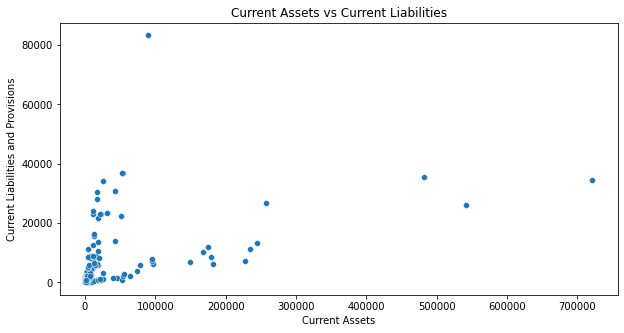

In [29]:
plt.figure(figsize=(10,5))
plt.title('Current Assets vs Current Liabilities')
plt.xlabel('Current Assets')
plt.ylabel('Current Liabilities and Provisions')
sns.scatterplot(x=df['Current_Assets_'],y=df['Current_Liabilities_and_Provisions_'])
plt.show()

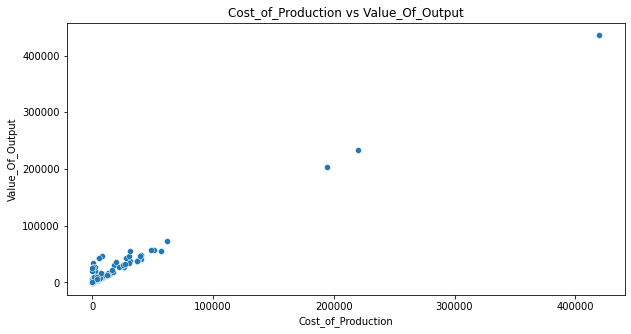

In [30]:
plt.figure(figsize=(10,5))
plt.title('Cost_of_Production vs Value_Of_Output')
plt.xlabel('Cost_of_Production')
plt.ylabel('Value_Of_Output')
sns.scatterplot(x=df['Cost_of_Production'],y=df['Value_Of_Output'])
plt.show()

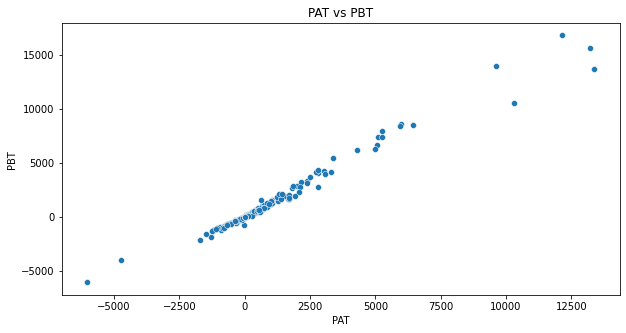

In [65]:
plt.figure(figsize=(10,5))
plt.title('PAT vs PBT')
plt.xlabel('PAT')
plt.ylabel('PBT')
sns.scatterplot(x=df['PAT'],y=df['PBT'])
plt.show()

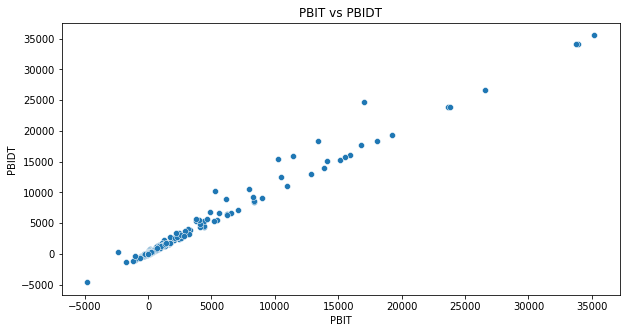

In [66]:
plt.figure(figsize=(10,5))
plt.title('PBIT vs PBIDT')
plt.xlabel('PBIT')
plt.ylabel('PBIDT')
sns.scatterplot(x=df['PBIT'],y=df['PBIDT'])
plt.show()

### Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

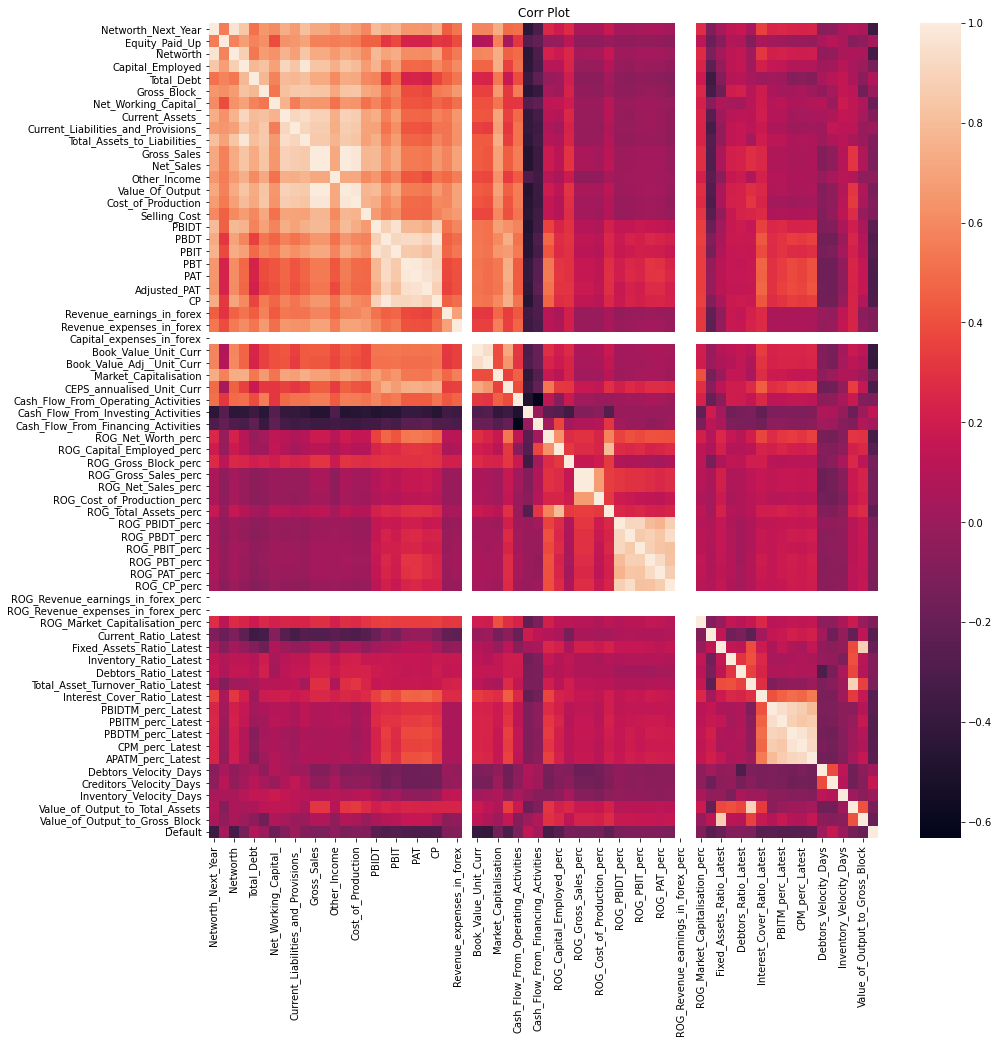

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(scaled_df.corr())
plt.title('Corr Plot')
plt.show

In [32]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
X = scaled_df.drop('Default', axis=1)
y = scaled_df['Default']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=25, step=1)
selector = selector.fit(X, y)

selector.ranking_.shape

(65,)

In [33]:
features = pd.DataFrame({'col':X.columns,
              'rank':selector.ranking_})

features = features[features['rank']==1]

X = scaled_df[features['col']]

In [34]:
X.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Other_Income,...,PAT,CP,Revenue_earnings_in_forex,Book_Value_Unit_Curr,Market_Capitalisation,ROG_Net_Sales_perc,Current_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,Debtors_Velocity_Days
0,-0.19,-0.03,-0.20,-0.12,-0.07,-0.05,-0.08,-0.08,-0.14,-0.10,...,-0.11,-0.14,-0.11,-0.15,-0.13,-0.04,-0.11,-0.05,0.03,-0.06
1,-0.19,-0.03,-0.20,-0.08,-0.07,-0.05,-0.08,-0.08,-0.09,-0.09,...,-0.11,-0.12,-0.11,-0.10,-0.11,-0.04,-0.11,-0.05,0.02,-0.05
2,-0.19,-0.03,-0.09,-0.08,-0.07,-0.05,-0.04,-0.08,-0.09,-0.09,...,-0.11,-0.14,-0.11,-0.03,-0.11,-0.05,-0.10,-0.05,0.01,-0.05
3,-0.19,-0.03,-0.20,-0.08,-0.07,-0.05,-0.08,-0.08,-0.09,-0.09,...,-0.11,-0.14,-0.11,-0.12,-0.11,-0.04,-0.11,-0.05,0.02,-0.05
4,-0.19,-0.03,-0.20,-0.08,-0.07,-0.05,-0.04,-0.08,-0.09,-0.09,...,-0.11,-0.14,-0.11,-0.15,-0.12,-0.05,-0.10,-0.05,0.01,-0.03


<function matplotlib.pyplot.show(close=None, block=None)>

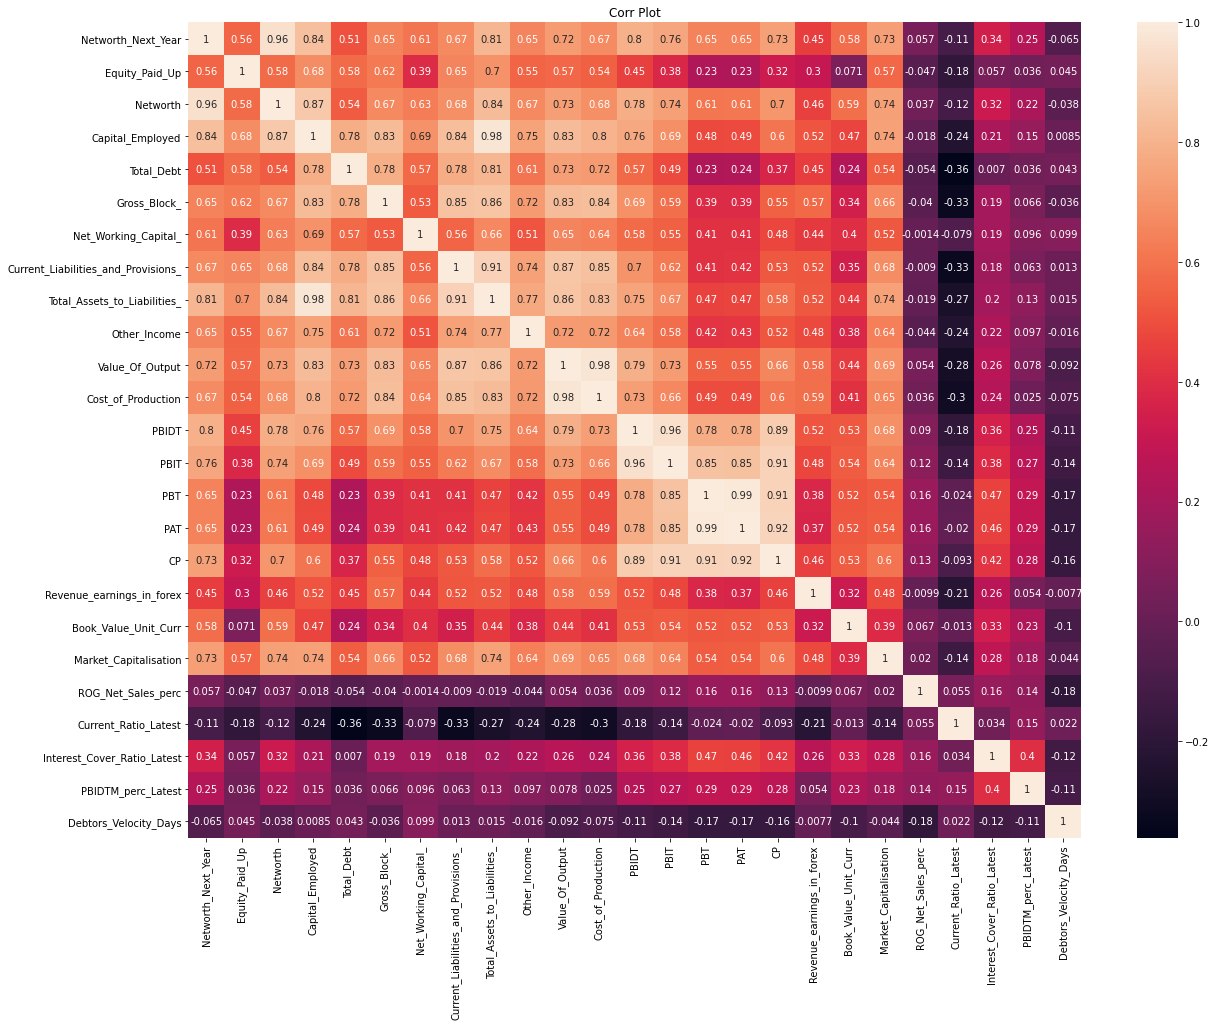

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),annot=True)
plt.title('Corr Plot')
plt.show

In [36]:
X.drop(['Capital_Employed','Value_Of_Output','Cost_of_Production','Networth','Networth_Next_Year',
'PBIDT','CP','PBT','PBIT','Current_Liabilities_and_Provisions_','Total_Assets_to_Liabilities_'], axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

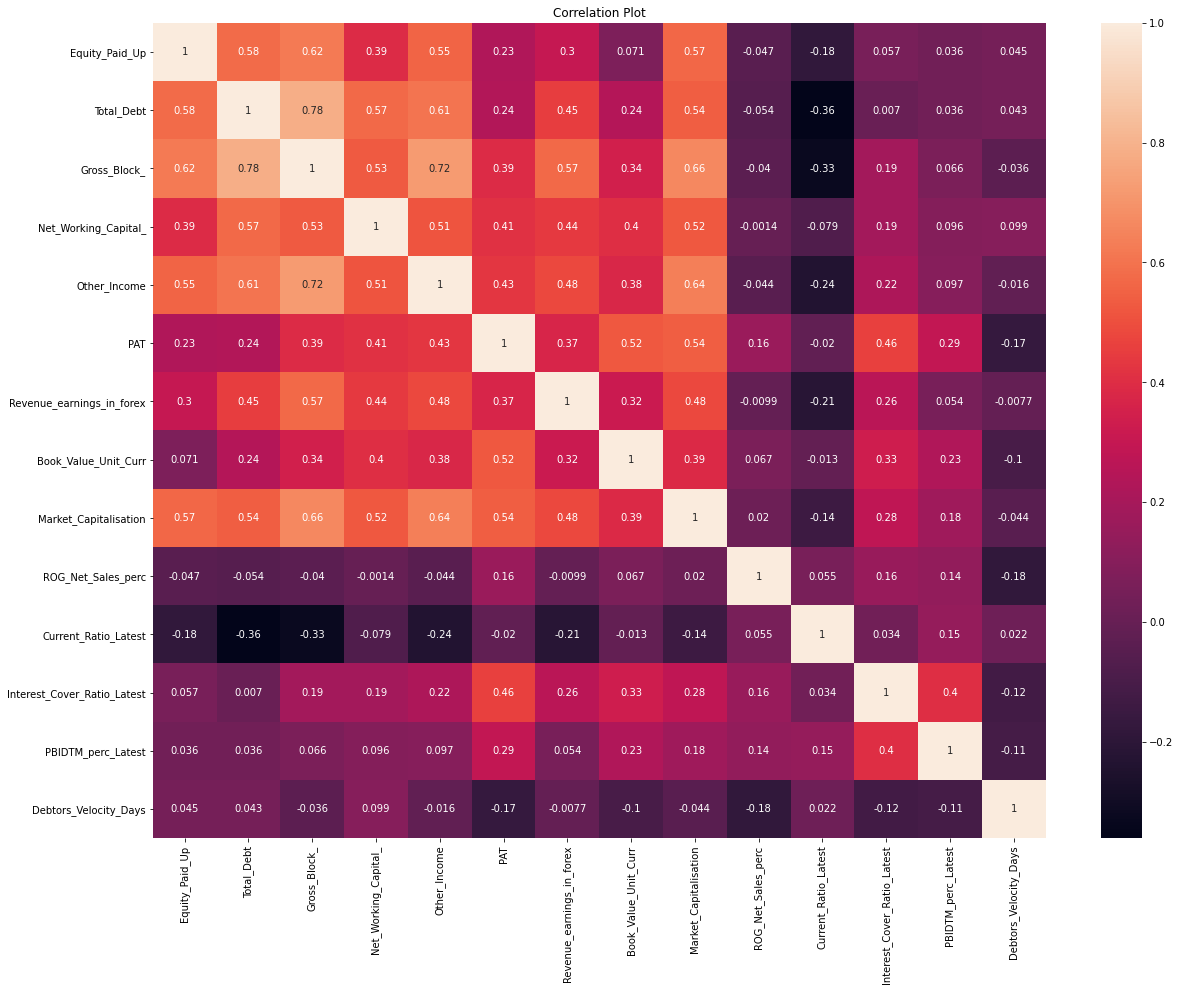

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),annot=True)
plt.title('Correlation Plot')
plt.show

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Build Logistic Regression Model 

In [39]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [40]:
df_train['Default'].value_counts()

0    2092
1     238
Name: Default, dtype: int64

In [41]:
df_test['Default'].value_counts()

0    1009
1     139
Name: Default, dtype: int64

## Model 1

In [42]:
import statsmodels.formula.api as SM

formula = 'Default ~ Equity_Paid_Up + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Other_Income + PAT + Revenue_earnings_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + ROG_Net_Sales_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days'
formula

'Default ~ Equity_Paid_Up + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Other_Income + PAT + Revenue_earnings_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + ROG_Net_Sales_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days'

In [43]:
df_train.shape

(2330, 15)

In [44]:
model1 =SM.logit(formula ,df_train).fit(method='bfgs',maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.119151
         Iterations: 149
         Function evaluations: 150
         Gradient evaluations: 150


In [45]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2315
Method:                           MLE   Df Model:                           14
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.6387
Time:                        14:02:42   Log-Likelihood:                -277.62
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.458e-200
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -33.8911      8.039     -4.216      0.000     -49.648     -18.134
Equity_Paid_Up                -19.7044      9.378     -2.101      0.036     -38.085      -1.324
Total_Debt                     44.3735     96.238      0.461      0.645    -144.249     232.996
Gross_Block_                   16.6206     13.429      1.238      0.216      -9.701      42.942
Net_Working_Capital_           32.5319     22.791      1.427      0.153     -12.138      77.201
Other_Income                   -4.6053     21.855     -0.211      0.833     -47.440      38.230
PAT                           -61.9970     20.993     -2.953      0.003    -103.142     -20.852
Revenue_earnings_in_forex     -11.9821     30.658     -0.391      0.696     -72.071      48.107
Book_Value_Unit_Curr         -177.7893     16.572    -10.728      0.000    -210.270    -145.309
Market_Capitalisation         -41.5417     29.003     -1.432      0.152     -98.387      15.304
ROG_Net_Sales_perc            -43.4812     21.728     -2.001      0.045     -86.067      -0.896
Current_Ratio_Latest          -61.0861     10.769     -5.672      0.000     -82.194     -39.978
Interest_Cover_Ratio_Latest   -40.3152     17.424     -2.314      0.021     -74.466      -6.164
PBIDTM_perc_Latest            -52.0479     13.637     -3.817      0.000     -78.775     -25.320
Debtors_Velocity_Days         -25.4680     14.014     -1.817      0.069     -52.935       1.999
===============================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Model Validation and Performance Measures

### Train Data

In [46]:
y_prob_pred_train = model1.predict(df_train)
y_prob_pred_train.reset_index(inplace=True, drop='index')
y_prob_pred_train.head()

0   0.74
1   0.00
2   0.00
3   0.01
4   0.00
dtype: float64

In [47]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)        

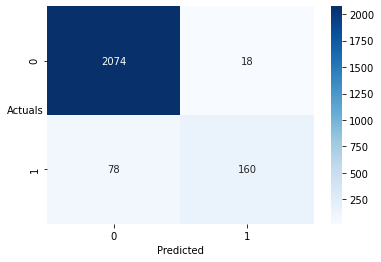

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

sns.heatmap((confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [49]:
print(classification_report(df_train['Default'],y_class_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2092
           1       0.90      0.67      0.77       238

    accuracy                           0.96      2330
   macro avg       0.93      0.83      0.87      2330
weighted avg       0.96      0.96      0.96      2330



### Test Data

In [50]:
y_prob_pred_test = model1.predict(df_test)
y_prob_pred_test.reset_index(inplace=True, drop='index')
y_prob_pred_test.head()

0   0.00
1   0.06
2   0.67
3   0.00
4   0.00
dtype: float64

In [51]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)  

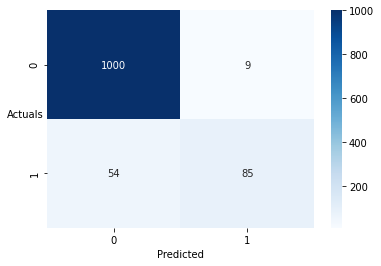

In [52]:
sns.heatmap((confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [53]:
print(classification_report(df_test['Default'],y_class_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1009
           1       0.90      0.61      0.73       139

    accuracy                           0.95      1148
   macro avg       0.93      0.80      0.85      1148
weighted avg       0.94      0.95      0.94      1148



## Model 2

In [54]:
formula1 = 'Default ~ Equity_Paid_Up + PAT + Book_Value_Unit_Curr + ROG_Net_Sales_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days '
formula1

'Default ~ Equity_Paid_Up + PAT + Book_Value_Unit_Curr + ROG_Net_Sales_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days '

In [55]:
model2 =SM.logit(formula1 ,df_train).fit(method='bfgs',maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.121764
         Iterations: 105
         Function evaluations: 107
         Gradient evaluations: 107


In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2321
Method:                           MLE   Df Model:                            8
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.6308
Time:                        14:02:42   Log-Likelihood:                -283.71
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                6.245e-204
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -34.4460      3.065    -11.240      0.000     -40.452     -28.440
Equity_Paid_Up                -11.2457      7.408     -1.518      0.129     -25.765       3.273
PAT                           -73.9977     20.350     -3.636      0.000    -113.883     -34.112
Book_Value_Unit_Curr         -172.2630     15.538    -11.087      0.000    -202.716    -141.810
ROG_Net_Sales_perc            -39.4143     21.039     -1.873      0.061     -80.651       1.822
Current_Ratio_Latest          -59.7016     10.041     -5.946      0.000     -79.381     -40.022
Interest_Cover_Ratio_Latest   -40.5006     16.920     -2.394      0.017     -73.664      -7.338
PBIDTM_perc_Latest            -47.6611     13.079     -3.644      0.000     -73.296     -22.026
Debtors_Velocity_Days         -30.2354     13.765     -2.196      0.028     -57.215      -3.256
===============================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Model Validation and Performance Measures

### Train Data

In [57]:
y_prob_pred_train = model2.predict(df_train)
y_prob_pred_train.reset_index(inplace=True, drop='index')
y_prob_pred_train.head()

0   0.74
1   0.00
2   0.00
3   0.01
4   0.00
dtype: float64

In [58]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.45:
        a=1
    else:
        a=0
    y_class_pred.append(a)  

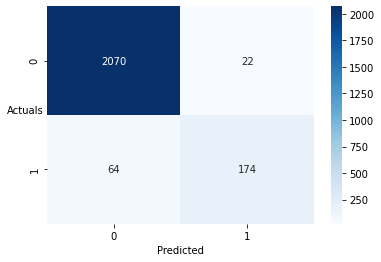

In [59]:
sns.heatmap((confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [60]:
print(classification_report(df_train['Default'],y_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2092
           1       0.89      0.73      0.80       238

    accuracy                           0.96      2330
   macro avg       0.93      0.86      0.89      2330
weighted avg       0.96      0.96      0.96      2330



### Test Data

In [61]:
y_prob_pred_test = model2.predict(df_test)
y_prob_pred_test.reset_index(inplace=True, drop='index')
y_prob_pred_test.head()

0   0.00
1   0.06
2   0.66
3   0.00
4   0.00
dtype: float64

In [62]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.45:
        a=1
    else:
        a=0
    y_class_pred.append(a)  

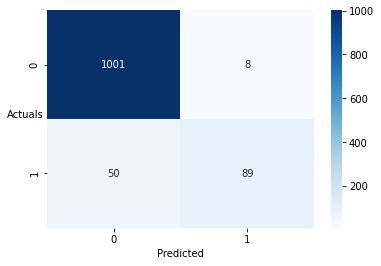

In [63]:
sns.heatmap((confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [64]:
print(classification_report(df_test['Default'],y_class_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1009
           1       0.92      0.64      0.75       139

    accuracy                           0.95      1148
   macro avg       0.93      0.82      0.86      1148
weighted avg       0.95      0.95      0.95      1148

